In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 256)
        self.fc2 = nn.Linear(256, 256)
        #self.fc3 = nn.Linear(256, 256)
        #self.fc4 = nn.Linear(128, 128)
        #self.fc5 = nn.Linear(128, 128)
        #self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(256, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        #x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return F.log_softmax(x)
        #return F.softmax(x)

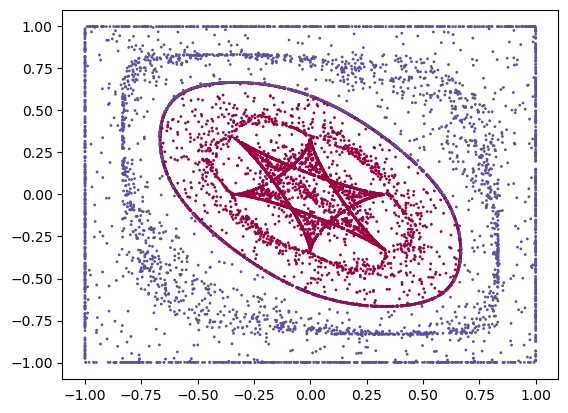

In [3]:
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()

data = pd.read_csv("FeedForward_Data_ellipse.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)



In [4]:
#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

# create a loss function
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

#nepochs = 600
nepochs = 10000
#10000
data, target = X, y

for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        #if(loss.item()<0.0001):
          #break
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if (accuracy==1):
            break

C:\Users\aradh\AppData\Local\Temp\ipykernel_53704\2298959118.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  0.6946420073509216
Training accuracy is  0.5565321914206296
Epoch  10 Loss  0.31295934319496155
Training accuracy is  0.8316430020283976
Epoch  20 Loss  0.22611896693706512
Training accuracy is  0.8807001727894223
Epoch  30 Loss  0.20691372454166412
Training accuracy is  0.8967019758094809
Epoch  40 Loss  0.19981667399406433
Training accuracy is  0.8980542408534294
Epoch  50 Loss  0.19721658527851105
Training accuracy is  0.8990308767185035
Epoch  60 Loss  0.1955541968345642
Training accuracy is  0.8991060025542784
Epoch  70 Loss  0.19441573321819305
Training accuracy is  0.8992562542258282
Epoch  80 Loss  0.19388648867607117
Training accuracy is  0.8992562542258282
Epoch  90 Loss  0.19352933764457703
Training accuracy is  0.899481631733153
Epoch  100 Loss  0.19351603090763092
Training accuracy is  0.8990308767185035
Epoch  110 Loss  0.19392076134681702
Training accuracy is  0.9000826384193524
Epoch  120 Loss  0.19370155036449432
Training accuracy is  0.8991060025542784


Epoch  1060 Loss  0.1826520413160324
Training accuracy is  0.9002328900909022
Epoch  1070 Loss  0.1894940584897995
Training accuracy is  0.8999323867478025
Epoch  1080 Loss  0.18300171196460724
Training accuracy is  0.900458267598227
Epoch  1090 Loss  0.19433483481407166
Training accuracy is  0.9665690030801593
Epoch  1100 Loss  0.18281549215316772
Training accuracy is  0.9002328900909022
Epoch  1110 Loss  0.1850775182247162
Training accuracy is  0.9002328900909022
Epoch  1120 Loss  0.19603629410266876
Training accuracy is  0.8997070092404778
Epoch  1130 Loss  0.18649311363697052
Training accuracy is  0.9013597776275261
Epoch  1140 Loss  0.18424618244171143
Training accuracy is  0.9009841484486515
Epoch  1150 Loss  0.1859019547700882
Training accuracy is  0.9009090226128765
Epoch  1160 Loss  0.18385416269302368
Training accuracy is  0.9003080159266772
Epoch  1170 Loss  0.18930844962596893
Training accuracy is  0.8998572609120277
Epoch  1180 Loss  0.18532730638980865
Training accuracy i

Epoch  2110 Loss  0.19217482209205627
Training accuracy is  0.9018856584779505
Epoch  2120 Loss  0.18390464782714844
Training accuracy is  0.9002328900909022
Epoch  2130 Loss  0.1806781142950058
Training accuracy is  0.900533393434002
Epoch  2140 Loss  0.17884387075901031
Training accuracy is  0.9026369168356998
Epoch  2150 Loss  0.18732957541942596
Training accuracy is  0.9149575539027872
Epoch  2160 Loss  0.18313367664813995
Training accuracy is  0.9002328900909022
Epoch  2170 Loss  0.18008078634738922
Training accuracy is  0.9007587709413267
Epoch  2180 Loss  0.17853040993213654
Training accuracy is  0.9008338967771017
Epoch  2190 Loss  0.1852964460849762
Training accuracy is  0.9002328900909022
Epoch  2200 Loss  0.19651387631893158
Training accuracy is  0.8962512207948313
Epoch  2210 Loss  0.1829298883676529
Training accuracy is  0.9010592742844264
Epoch  2220 Loss  0.1786121279001236
Training accuracy is  0.9008338967771017
Epoch  2230 Loss  0.1839727908372879
Training accuracy is

Epoch  3160 Loss  0.1900528073310852
Training accuracy is  0.9456088948989557
Epoch  3170 Loss  0.1791945993900299
Training accuracy is  0.9801667793554203
Epoch  3180 Loss  0.17502665519714355
Training accuracy is  0.9477124183006536
Epoch  3190 Loss  0.17964132130146027
Training accuracy is  0.9637893471564871
Epoch  3200 Loss  0.18432822823524475
Training accuracy is  0.9829464352790925
Epoch  3210 Loss  0.18042254447937012
Training accuracy is  0.9809180377131695
Epoch  3220 Loss  0.17742078006267548
Training accuracy is  0.9664938772443843
Epoch  3230 Loss  0.17951540648937225
Training accuracy is  0.9698745398542559
Epoch  3240 Loss  0.1828249990940094
Training accuracy is  0.9831718127864173
Epoch  3250 Loss  0.1806270182132721
Training accuracy is  0.9829464352790925
Epoch  3260 Loss  0.17712557315826416
Training accuracy is  0.9672451356021335
Epoch  3270 Loss  0.17946656048297882
Training accuracy is  0.971677559912854
Epoch  3280 Loss  0.1826980859041214
Training accuracy is

Epoch  4210 Loss  0.17716266214847565
Training accuracy is  0.9820449252497934
Epoch  4220 Loss  0.17321380972862244
Training accuracy is  0.9869281045751634
Epoch  4230 Loss  0.1722138226032257
Training accuracy is  0.9829464352790925
Epoch  4240 Loss  0.17541171610355377
Training accuracy is  0.9867778529036135
Epoch  4250 Loss  0.17856861650943756
Training accuracy is  0.9855758395312147
Epoch  4260 Loss  0.17881542444229126
Training accuracy is  0.9764104875666741
Epoch  4270 Loss  0.17436684668064117
Training accuracy is  0.9861768462174142
Epoch  4280 Loss  0.17233777046203613
Training accuracy is  0.9854255878596649
Epoch  4290 Loss  0.17351341247558594
Training accuracy is  0.9852753361881151
Epoch  4300 Loss  0.17746210098266602
Training accuracy is  0.9867778529036135
Epoch  4310 Loss  0.17950539290905
Training accuracy is  0.9766358650739989
Epoch  4320 Loss  0.17576415836811066
Training accuracy is  0.98046728269852
Epoch  4330 Loss  0.17234335839748383
Training accuracy is

Epoch  5260 Loss  0.17355935275554657
Training accuracy is  0.9866276012320637
Epoch  5270 Loss  0.1743961125612259
Training accuracy is  0.9810682893847193
Epoch  5280 Loss  0.1730756014585495
Training accuracy is  0.9791150176545714
Epoch  5290 Loss  0.17203807830810547
Training accuracy is  0.9801667793554203
Epoch  5300 Loss  0.17172056436538696
Training accuracy is  0.9858763428743145
Epoch  5310 Loss  0.17084835469722748
Training accuracy is  0.98535046202389
Epoch  5320 Loss  0.16961130499839783
Training accuracy is  0.9861017203816392
Epoch  5330 Loss  0.170369952917099
Training accuracy is  0.9893321313199609
Epoch  5340 Loss  0.17278334498405457
Training accuracy is  0.9860265945458643
Epoch  5350 Loss  0.17364318668842316
Training accuracy is  0.9779130042821726
Epoch  5360 Loss  0.17382897436618805
Training accuracy is  0.9794155209976712
Epoch  5370 Loss  0.17272666096687317
Training accuracy is  0.9759597325520246
Epoch  5380 Loss  0.17248883843421936
Training accuracy is

Epoch  6310 Loss  0.1636534482240677
Training accuracy is  0.9010592742844264
Epoch  6320 Loss  0.16301329433918
Training accuracy is  0.9012846517917512
Epoch  6330 Loss  0.16237807273864746
Training accuracy is  0.9011344001202013
Epoch  6340 Loss  0.16174495220184326
Training accuracy is  0.9012095259559763
Epoch  6350 Loss  0.16111989319324493
Training accuracy is  0.9012846517917512
Epoch  6360 Loss  0.16038045287132263
Training accuracy is  0.9012846517917512
Epoch  6370 Loss  0.15959973633289337
Training accuracy is  0.9017354068064007
Epoch  6380 Loss  0.18339164555072784
Training accuracy is  0.927879197656074
Epoch  6390 Loss  0.1897522658109665
Training accuracy is  0.9311096085943956
Epoch  6400 Loss  0.1844603419303894
Training accuracy is  0.9513184584178499
Epoch  6410 Loss  0.1784190535545349
Training accuracy is  0.9523702201186989
Epoch  6420 Loss  0.17332236468791962
Training accuracy is  0.981443918563594
Epoch  6430 Loss  0.1641458421945572
Training accuracy is  0.

Epoch  7360 Loss  0.15605974197387695
Training accuracy is  0.9120276463075652
Epoch  7370 Loss  0.1762915551662445
Training accuracy is  0.9139809180377132
Epoch  7380 Loss  0.16437488794326782
Training accuracy is  0.931710615280595
Epoch  7390 Loss  0.1651148647069931
Training accuracy is  0.9335136353391932
Epoch  7400 Loss  0.16669043898582458
Training accuracy is  0.9067688378033205
Epoch  7410 Loss  0.17373032867908478
Training accuracy is  0.9009841484486515
Epoch  7420 Loss  0.17751364409923553
Training accuracy is  0.9009090226128765
Epoch  7430 Loss  0.160936638712883
Training accuracy is  0.9009841484486515
Epoch  7440 Loss  0.16694708168506622
Training accuracy is  0.9411013447524603
Epoch  7450 Loss  0.1876402497291565
Training accuracy is  0.8943730749004583
Epoch  7460 Loss  0.16912133991718292
Training accuracy is  0.9193899782135077
Epoch  7470 Loss  0.15968506038188934
Training accuracy is  0.9263015551048005
Epoch  7480 Loss  0.17906449735164642
Training accuracy is

Epoch  8410 Loss  0.16506411135196686
Training accuracy is  0.9015851551348508
Epoch  8420 Loss  0.16234570741653442
Training accuracy is  0.9078205995041695
Epoch  8430 Loss  0.1604631543159485
Training accuracy is  0.9010592742844264
Epoch  8440 Loss  0.15992474555969238
Training accuracy is  0.9010592742844264
Epoch  8450 Loss  0.15931424498558044
Training accuracy is  0.9015851551348508
Epoch  8460 Loss  0.1587650328874588
Training accuracy is  0.9019607843137255
Epoch  8470 Loss  0.1582518219947815
Training accuracy is  0.9025617909999248
Epoch  8480 Loss  0.15778593719005585
Training accuracy is  0.9023364134926001
Epoch  8490 Loss  0.15730178356170654
Training accuracy is  0.9023364134926001
Epoch  8500 Loss  0.15682083368301392
Training accuracy is  0.9027871685072496
Epoch  8510 Loss  0.15633505582809448
Training accuracy is  0.9030125460145744
Epoch  8520 Loss  0.15583102405071259
Training accuracy is  0.9031627976861243
Epoch  8530 Loss  0.1553144007921219
Training accuracy 

Epoch  9460 Loss  0.2117592990398407
Training accuracy is  0.9002328900909022
Epoch  9470 Loss  0.24832774698734283
Training accuracy is  0.9009841484486515
Epoch  9480 Loss  0.1554996818304062
Training accuracy is  0.9051160694162722
Epoch  9490 Loss  0.1619713008403778
Training accuracy is  0.9333633836676433
Epoch  9500 Loss  0.15679240226745605
Training accuracy is  0.9081211028472692
Epoch  9510 Loss  0.15438345074653625
Training accuracy is  0.9016602809706258
Epoch  9520 Loss  0.15345057845115662
Training accuracy is  0.9086469836976936
Epoch  9530 Loss  0.15265844762325287
Training accuracy is  0.912177897979115
Epoch  9540 Loss  0.1514662802219391
Training accuracy is  0.9149575539027872
Epoch  9550 Loss  0.15038062632083893
Training accuracy is  0.9117271429644654
Epoch  9560 Loss  0.14931711554527283
Training accuracy is  0.9150326797385621
Epoch  9570 Loss  0.14811404049396515
Training accuracy is  0.9175118323191346
Epoch  9580 Loss  0.14732681214809418
Training accuracy i

Epoch  5240 Loss  0.17049048840999603 <br>
Training accuracy is  0.9900082638419352

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)
plot_decision_boundary(net, X, y, 'P2_Q2_A.pdf')

C:\Users\aradh\AppData\Local\Temp\ipykernel_53704\2298959118.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [6]:
plot_decision_boundary(net, X, y, 'P2_Q2_A')

C:\Users\aradh\AppData\Local\Temp\ipykernel_53704\2298959118.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
